In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from sklearn.model_selection import train_test_split

2.2.0


In [ ]:
#load the data (from sklearn)
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data set to a variable
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target #one dimensional array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data['target'].shape

(569,)

In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(data['data'],data['target'], 
                                                     test_size=0.33)

N, D = X_train.shape #assign variable N D for later user

In [ ]:
from sklearn.preprocessing import StandardScaler # scale our data which is standardisation 

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9161 - accuracy: 0.3937 - val_loss: 0.9134 - val_accuracy: 0.4149
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8240 - accuracy: 0.4514 - val_loss: 0.8121 - val_accuracy: 0.5266
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7416 - accuracy: 0.5381 - val_loss: 0.7236 - val_accuracy: 0.5798
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6669 - accuracy: 0.6115 - val_loss: 0.6499 - val_accuracy: 0.6330
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.6667 - val_loss: 0.5875 - val_accuracy: 0.7128
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 0.7165 - val_loss: 0.5346 - val_accuracy: 0.7553
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.7743 - val_loss: 0.4910 - val_accuracy: 0.8191
Epoch 8/100


In [ ]:
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9816
Train Score: [0.09458820521831512, 0.9816272854804993]
6/6 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9521
Test Score: [0.11955489218235016, 0.9521276354789734]


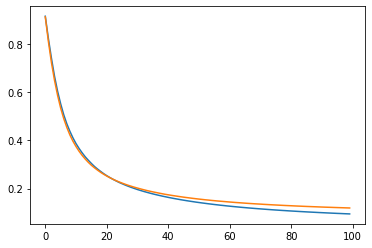

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss');

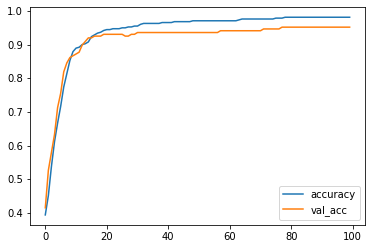

In [ ]:
#plot the accuracy 
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
#Make predictions
P = model.predict(X_test)

In [ ]:
print(P)

[[9.9999988e-01]
 [9.9464524e-01]
 [1.0000000e+00]
 [5.3091022e-14]
 [1.5270763e-23]
 [0.0000000e+00]
 [4.0372858e-38]
 [9.9992204e-01]
 [7.2703362e-03]
 [0.0000000e+00]
 [9.9999905e-01]
 [9.9999803e-01]
 [2.3693740e-03]
 [8.8582486e-01]
 [5.7478522e-28]
 [9.9663591e-01]
 [9.9979639e-01]
 [9.9999976e-01]
 [2.7111739e-01]
 [9.8333549e-01]
 [8.2298791e-01]
 [9.9745286e-01]
 [5.8853984e-01]
 [1.8375042e-26]
 [1.0000000e+00]
 [9.2191749e-10]
 [0.0000000e+00]
 [9.9999595e-01]
 [4.2242354e-01]
 [9.6897250e-01]
 [9.9994189e-01]
 [1.0000000e+00]
 [9.9996549e-01]
 [0.0000000e+00]
 [6.1381620e-08]
 [9.9999797e-01]
 [7.2823763e-03]
 [1.6276300e-02]
 [1.0855168e-02]
 [9.9998921e-01]
 [9.9992049e-01]
 [9.9999660e-01]
 [9.9968797e-01]
 [9.9999917e-01]
 [1.4555311e-01]
 [9.9983895e-01]
 [1.0000000e+00]
 [9.9999803e-01]
 [9.9999899e-01]
 [9.9999714e-01]
 [1.1124533e-05]
 [9.9981642e-01]
 [0.0000000e+00]
 [8.7481746e-25]
 [8.3253461e-01]
 [7.8444600e-01]
 [1.0000000e+00]
 [9.9999964e-01]
 [9.9999970e-0